In [1]:
import sys
sys.path.append("/Users/shamanthk/Documents/Research/IS-modeling-connectomes")
from utils import *
from Connectome import *

In [2]:
avg_connectome = Connectome(file='/Users/shamanthk/Documents/Research/IS-modeling-connectomes/Averaged_1015.graphml', label='average')

In [3]:
avg_connectome.read_matrix()

<Compressed Sparse Row sparse array of dtype 'int64'
	with 198342 stored elements and shape (1015, 1015)>

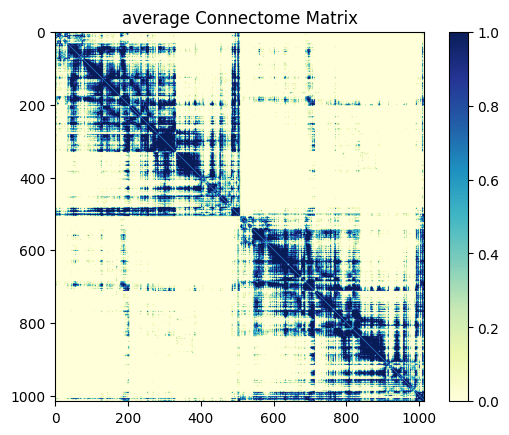

In [4]:
avg_connectome.plot_matrix()

In [6]:
avg_connectome.read_net(use_3d=True)

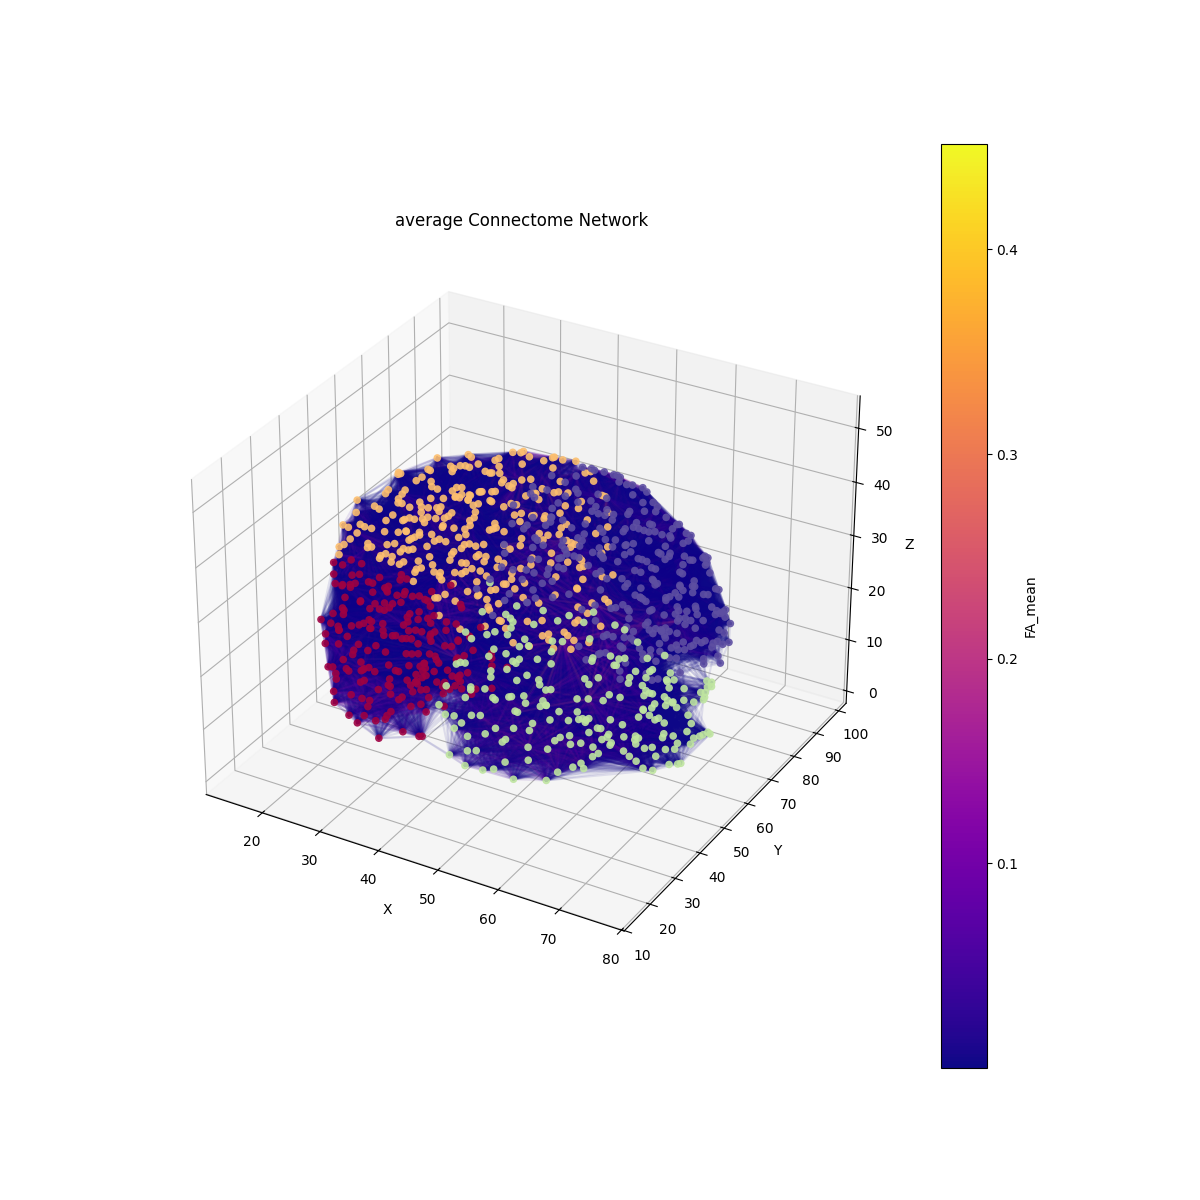

In [8]:
%matplotlib widget
avg_connectome.plot_net(use_3d=True, clustering=True)